# Random Forest Regressor

Random forest method achieves better performance than a single decision tree simply by averaging the predictions of many decision trees.

We refer to the random forest method as an **ensemble method**. By definition, ensemble methods combine the predictions of several models (e.g., several trees, in the case of random forests).

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load boston housing csv
boston_housing_df = pd.read_csv('boston_housing.csv')
boston_housing_df.head()                              

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# define dependent and independent variables
y = boston_housing_df['SalePrice']
print(y.head())
predictive_features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
x = boston_housing_df[predictive_features]
print(x.head())

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64
   LotArea  YearBuilt  1stFlrSF  2ndFlrSF  FullBath  BedroomAbvGr  \
0     8450       2003       856       854         2             3   
1     9600       1976      1262         0         2             3   
2    11250       2001       920       866         2             3   
3     9550       1915       961       756         1             3   
4    14260       2000      1145      1053         2             4   

   TotRmsAbvGrd  
0             8  
1             6  
2             6  
3             7  
4             9  


In [4]:
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state=1)
print("Training data's x")
print(train_x.head())
print("Training data's y")
print(train_y.head())
print("Testing data's x")
print(test_x.head())
print("Testing data's y")
print(test_y.head())

Training data's x
      LotArea  YearBuilt  1stFlrSF  2ndFlrSF  FullBath  BedroomAbvGr  \
6       10084       2004      1694         0         2             3   
807     21384       1923      1072       504         1             3   
955      7136       1946       979       979         2             4   
1040    13125       1957      1803         0         2             3   
701      9600       1969      1164         0         1             3   

      TotRmsAbvGrd  
6                7  
807              6  
955              8  
1040             8  
701              6  
Training data's y
6       307000
807     223500
955     145000
1040    155000
701     140000
Name: SalePrice, dtype: int64
Testing data's x
      LotArea  YearBuilt  1stFlrSF  2ndFlrSF  FullBath  BedroomAbvGr  \
258     12435       2001       963       829         2             3   
267      8400       1939      1052       720         2             4   
288      9819       1967       900         0         1             

## Fit the model using training data

In [5]:
# define model
boston_housing_model = RandomForestRegressor(random_state=1)

# fit the model using train data
boston_housing_model.fit(train_x, train_y)

# make predictions on test data
predicted_prices = boston_housing_model.predict(test_x)

# evaluate model
mae = mean_absolute_error(test_y, predicted_prices)
print('Mae based on training data:', mae)

Mae based on training data: 21857.15912981083


## Fit the model using all data

In [6]:
# fit the model using all data
boston_housing_model.fit(x, y)

# make predictions on all data
predicted_prices = boston_housing_model.predict(x)

# evaluate model
mae = mean_absolute_error(y, predicted_prices)
print('Mae based on all data:',mae)

Mae based on all data: 8299.72804109589


Observations made:
    
* The model performs better when all the data is used in training (8299.72804109589 < 21857.15912981083).
* Random Forest performs better than Decision Tree Regressor (8299.72804109589 < 16629.182745225255).

## Evaluating several models

We set the number of trees in the random forest model with the **n_estimators** parameter, and setting **random_state** ensures reproducibility.

In [7]:
# Define the models
model_1 = RandomForestRegressor(n_estimators=50, random_state=0)
model_2 = RandomForestRegressor(n_estimators=100, random_state=0)
model_3 = RandomForestRegressor(n_estimators=100, criterion='mae', random_state=0)
model_4 = RandomForestRegressor(n_estimators=200, min_samples_split=20, random_state=0)
model_5 = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=0)

models = [model_1, model_2, model_3, model_4, model_5]

In [8]:
# Function for comparing different models
def score_model(model, X_t=train_x, X_v=test_x, y_t=train_y, y_v=test_y):
    model.fit(X_t, y_t)
    preds = model.predict(X_v)
    return mean_absolute_error(y_v, preds)

for i in range(0, len(models)):
    mae = score_model(models[i])
    print("Model %d MAE: %d" % (i+1, mae))

Model 1 MAE: 22285
Model 2 MAE: 22118
Model 3 MAE: 22152
Model 4 MAE: 22624
Model 5 MAE: 22401


Model 2 is the best since it has the lowest MAE

## Dealing with Missing values
Most machine learning libraries (including scikit-learn) give an error if you try to build a model using data with missing values. So you'll need to choose one of the strategies below:
* A Simple Option: Drop Columns with Missing Values
* A Better Option: Imputation
* An Extension To Imputation

In [9]:
boston_housing_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

### Score from Approach 1 (Drop Columns with Missing Values)

In [10]:
y = boston_housing_df['SalePrice']
# To keep things simple, we'll use only numerical predictors
boston_housing_df_missing_saleprice = boston_housing_df.drop(['SalePrice'], axis=1)
X = boston_housing_df_missing_saleprice.select_dtypes(exclude=['object'])
# Divide data into training and validation subsets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

Define Function to Measure Quality of Each Approach

We define a function score_dataset() to compare different approaches to dealing with missing values. This function reports the mean absolute error (MAE) from a random forest model.

In [11]:
# Function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=10, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

In [12]:
# Get names of columns with missing values
cols_with_missing = [col for col in X_train.columns
                     if X_train[col].isnull().any()]

Since we are working with both training and validation sets, we are careful to drop the same columns in both DataFrames.

In [13]:
# Drop columns in training and validation data
reduced_X_train = X_train.drop(cols_with_missing, axis=1)
reduced_X_valid = X_valid.drop(cols_with_missing, axis=1)

print("MAE from Approach 1 (Drop columns with missing values):")
print(score_dataset(reduced_X_train, reduced_X_valid, y_train, y_valid))

MAE from Approach 1 (Drop columns with missing values):
19003.3198630137


### Score from Approach 2 (Imputation)

In [14]:
# Imputation
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_valid))

# Imputation removed column names; put them back
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns

print("MAE from Approach 2 (Imputation):")
print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_valid))

MAE from Approach 2 (Imputation):
19243.57294520548


### Score from Approach 3 (An Extension to Imputation)

In [15]:
# Make copy to avoid changing original data (when imputing)
X_train_plus = X_train.copy()
X_valid_plus = X_valid.copy()

# Make new columns indicating what will be imputed
for col in cols_with_missing:
    X_train_plus[col + '_was_missing'] = X_train_plus[col].isnull()
    X_valid_plus[col + '_was_missing'] = X_valid_plus[col].isnull()

# Imputation
my_imputer = SimpleImputer()
imputed_X_train_plus = pd.DataFrame(my_imputer.fit_transform(X_train_plus))
imputed_X_valid_plus = pd.DataFrame(my_imputer.transform(X_valid_plus))

# Imputation removed column names; put them back
imputed_X_train_plus.columns = X_train_plus.columns
imputed_X_valid_plus.columns = X_valid_plus.columns

print("MAE from Approach 3 (An Extension to Imputation):")
print(score_dataset(imputed_X_train_plus, imputed_X_valid_plus, y_train, y_valid))

MAE from Approach 3 (An Extension to Imputation):
19349.617465753425


[Kaggle's Missing Values](https://www.kaggle.com/alexisbcook/missing-values)

[Kaggle's Missing Values Exercise](https://www.kaggle.com/aubreyjohn/exercise-missing-values/edit)

Given that thre are so few missing values in the dataset, we'd expect imputation to perform better than dropping columns entirely. However, we see that dropping columns performs slightly better! 

While this can probably partially be attributed to noise in the dataset, another potential explanation is that the imputation method is not a great match to this dataset. 

That is, maybe instead of filling in the mean value, it makes more sense to set every missing value to a value of 0, to fill in the most frequently encountered value, or to use some other method. 

For instance, consider the GarageYrBlt column (which indicates the year that the garage was built). It's likely that in some cases, a missing value could indicate a house that does not have a garage. 

Does it make more sense to fill in the median value along each column in this case? Or could we get better results by filling in the minimum value along each column? 

It's not quite clear what's best in this case, but perhaps we can rule out some options immediately - for instance, setting missing values in this column to 0 is likely to yield horrible results!

# Categorical Variables
A categorical variable takes only a limited number of values.

You will get an error if you try to plug these variables into most machine learning models in Python without preprocessing them first. 

We'll compare three approaches that you can use to prepare your categorical data:
* Drop Categorical Variables¶
* Label Encoding
* One-Hot Encoding

In [16]:
# Function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

In [17]:
# Separate target from predictors
y = boston_housing_df.SalePrice
X = boston_housing_df.drop(['SalePrice'], axis=1)

# Divide data into training and validation subsets
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

# Drop columns with missing values
cols_with_missing = [col for col in X_train_full.columns if X_train_full[col].isnull().any()] 
X_train_full.drop(cols_with_missing, axis=1, inplace=True)
X_valid_full.drop(cols_with_missing, axis=1, inplace=True)

# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = low_cardinality_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

/home/aubrey/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [18]:
X_train.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,BldgType,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
618,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,...,774,0,108,0,0,260,0,0,7,2007
870,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,PosN,Norm,1Fam,...,308,0,0,0,0,0,0,0,8,2009
92,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,Norm,Norm,1Fam,...,432,0,0,44,0,0,0,0,8,2009
817,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Norm,Norm,1Fam,...,857,150,59,0,0,0,0,0,7,2008
302,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,...,843,468,81,0,0,0,0,0,1,2006


Next, we obtain a list of all of the categorical variables in the training data.

We do this by checking the data type (or dtype) of each column. The object dtype indicates a column has text (there are other things it could theoretically be, but that's unimportant for our purposes). 

For this dataset, the columns with text indicate categorical variables.

In [19]:
# Get list of categorical variables
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']


We define a function score_dataset() to compare the three different approaches to dealing with categorical variables. 

This function reports the mean absolute error (MAE) from a random forest model. I

n general, we want the MAE to be as low as possible!

## Drop Categorical Variables¶
The easiest approach to dealing with categorical variables is to simply remove them from the dataset. This approach will only work well if the columns did not contain useful information.

We drop the object columns with the select_dtypes() method.

In [20]:
drop_X_train = X_train.select_dtypes(exclude=['object'])
drop_X_valid = X_valid.select_dtypes(exclude=['object'])

print("MAE from Approach 1 (Drop categorical variables):")
print(score_dataset(drop_X_train, drop_X_valid, y_train, y_valid))

MAE from Approach 1 (Drop categorical variables):
17952.591404109586


## Label Encoding
Label encoding assigns each unique value to a different integer.

![Label encoding](https://i.imgur.com/tEogUAr.png)

This approach assumes an ordering of the categories: "Never" (0) < "Rarely" (1) < "Most days" (2) < "Every day" (3).

This assumption makes sense in this example, because there is an indisputable ranking to the categories. 

Not all categorical variables have a clear ordering in the values, but we refer to those that do as **ordinal variables**. 

For tree-based models (like decision trees and random forests), you can expect label encoding to work well with ordinal variables.

Fitting a label encoder to a column in the training data creates a corresponding integer-valued label for each unique value that appears in the training data. 

In the case that the validation data contains values that don't also appear in the training data, the encoder will throw an error, because these values won't have an integer assigned to them.

The simplest approach, however, is to drop the problematic categorical columns.

In [21]:
# All categorical columns
object_cols = [col for col in X_train.columns if X_train[col].dtype == "object"]

# Columns that can be safely label encoded
good_label_cols = [col for col in object_cols if 
                   set(X_train[col]) == set(X_valid[col])]
        
# Problematic columns that will be dropped from the dataset
bad_label_cols = list(set(object_cols)-set(good_label_cols))
        
print('Categorical columns that will be label encoded:', good_label_cols)
print('\nCategorical columns that will be dropped from the dataset:', bad_label_cols)

Categorical columns that will be label encoded: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'BldgType', 'HouseStyle', 'ExterQual', 'CentralAir', 'KitchenQual', 'PavedDrive', 'SaleCondition']

Categorical columns that will be dropped from the dataset: ['Condition2', 'Heating', 'RoofStyle', 'ExterCond', 'RoofMatl', 'Functional', 'Condition1', 'Foundation', 'SaleType', 'LandSlope', 'Utilities', 'HeatingQC']


In [22]:
# Drop categorical columns that will not be encoded
label_X_train = X_train.drop(bad_label_cols, axis=1)
label_X_valid = X_valid.drop(bad_label_cols, axis=1)

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in good_label_cols:
    label_X_train[col] = label_encoder.fit_transform(X_train[col])
    label_X_valid[col] = label_encoder.transform(X_valid[col])

print("MAE from Approach 2 (Label Encoding):") 
print(score_dataset(label_X_train, label_X_valid, y_train, y_valid))

MAE from Approach 2 (Label Encoding):
17622.9305479452


## One-Hot Encoding
One-hot encoding creates new columns indicating the presence (or absence) of each possible value in the original data.

![One Hot encoding](https://i.imgur.com/TW5m0aJ.png)

In contrast to label encoding, one-hot encoding does not assume an ordering of the categories. Thus, you can expect this approach to work particularly well if there is no clear ordering in the categorical data (e.g., "Red" is neither more nor less than "Yellow"). 

We refer to categorical variables without an intrinsic ranking as **nominal variables**.

One-hot encoding generally does not perform well if the categorical variable takes on a large number of values (i.e., you generally won't use it for variables taking more than 15 different values).

**N/B**

For large datasets with many rows, one-hot encoding can greatly expand the size of the dataset.  For this reason, we typically will only one-hot encode columns with relatively low cardinality.  Then, high cardinality columns can either be dropped from the dataset, or we can use label encoding.

As an example, consider a dataset with 10,000 rows, and containing one categorical column with 100 unique entries.  
- If this column is replaced with the corresponding one-hot encoding, how many entries are added to the dataset?  
- If we instead replace the column with the label encoding, how many entries are added?  



Answer:

To calculate how many entries are added to the dataset through the one-hot encoding, begin by calculating how many entries are needed to encode the categorical variable (by multiplying the number of rows by the number of columns in the one-hot encoding). Then, to obtain how many entries are added to the dataset, subtract the number of entries in the original column.

990000

0

In [23]:
# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[low_cardinality_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[low_cardinality_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_valid.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

print("MAE from Approach 3 (One-Hot Encoding):") 
print(score_dataset(OH_X_train, OH_X_valid, y_train, y_valid))

MAE from Approach 3 (One-Hot Encoding):
17514.224246575344


In general, one-hot encoding (Approach 3) will typically perform best, and dropping the categorical columns (Approach 1) typically performs worst, but it varies on a case-by-case basis.

# Pipelines
Pipelines are a simple way to keep your data preprocessing and modeling code organized. Specifically, a pipeline bundles preprocessing and modeling steps so you can use the whole bundle as if it were a single step.

Many data scientists hack together models without pipelines, but pipelines have some important benefits. Those include:

1. Cleaner Code: Accounting for data at each step of preprocessing can get messy. With a pipeline, you won't need to manually keep track of your training and validation data at each step.
2. Fewer Bugs: There are fewer opportunities to misapply a step or forget a preprocessing step.
3. Easier to Productionize: It can be surprisingly hard to transition a model from a prototype to something deployable at scale. We won't go into the many related concerns here, but pipelines can help.
4. More Options for Model Validation: You will see an example in the next tutorial, which covers cross-validation.

We construct the full pipeline in three steps:
1.  Define Preprocessing Steps
2. Define the Model
3. Create and Evaluate the Pipeline


In [24]:
# read dataset
boston_housing_df = pd.read_csv('boston_housing.csv')
boston_housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Define target and predictive variables

In [25]:
def define_target_predictive_variables(data, target):
    '''
    takes 2 parameters: data(dataframe with all data) and target(column to act as target)
    returns target(y) and predictive variables(x)
    '''
    # check if target columns is missing any value
    if data[target].isnull().any():
        # remove rows with missing target and separate from predictors
        x_full = data.dropna(axis=0, subset=[target]) #, inplace=True
        y = x_full[target]
        x = x_full.drop([target], axis=1) #, inplace=True
    else:
        y = data[target]
        x = data.drop([target], axis=1) #, inplace=True
        
    return (x, y)

    
x, y = define_target_predictive_variables(boston_housing_df, 'SalePrice')

print(x.head())
print(y[:5])

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
4         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      2    2008        WD

### split x and y into train and test

In [26]:
# split x and y into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=0)

### get rid of low cardinality columms

In [27]:
def remove_low_cardinality_cols(x_train, x_test):
    # select categorical columns with relatively low cardinality
    categorical_cols = [col for col in x_train.columns
                        if x_train[col].nunique() < 10
                       and x_train[col].dtype == 'object']

    numerical_cols = [col for col in x_train.columns
                        if x_train[col].dtype in ['int64', 'float64']]
    
    # keep selected columns only
    selected_cols = categorical_cols + numerical_cols
    x_train = x_train[selected_cols].copy()
    x_test = x_test[selected_cols].copy()
    
    return (categorical_cols, numerical_cols, x_train, x_test)

categorical_cols, numerical_cols, x_train, x_test = remove_low_cardinality_cols(x_train, x_test)
print(x_train.head())
print(x_test.head())

    MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
618       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
870       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
92        RL   Pave  Grvl      IR1         HLS    AllPub    Inside       Gtl   
817       RL   Pave   NaN      IR1         Lvl    AllPub   CulDSac       Gtl   
302       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   

    Condition1 Condition2  ... GarageArea WoodDeckSF OpenPorchSF  \
618       Norm       Norm  ...        774          0         108   
870       PosN       Norm  ...        308          0           0   
92        Norm       Norm  ...        432          0           0   
817       Norm       Norm  ...        857        150          59   
302       Norm       Norm  ...        843        468          81   

    EnclosedPorch 3SsnPorch ScreenPorch PoolArea MiscVal MoSold YrSold  
618             0         0         2

### Define Preprocessing Steps

In [28]:
# preprocessing numerical columns
numerical_transformer = SimpleImputer(strategy='mean')

# preprocessing categorical columns
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# bundle preprocessing of numerical and categorical data
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# define model
model = RandomForestRegressor(n_estimators=100, random_state=0)

# create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# preprocessing of training data and fit model
pipeline = pipeline.fit(x_train, y_train)

# preprocessing of testing data and get predictions
preds = pipeline.predict(x_test)

# evaluate model
score = mean_absolute_error(y_test, preds)
print(score)

17721.08506849315


Machine learning is an iterative process.

You will face choices about what predictive variables to use, what types of models to use, what arguments to supply to those models, etc. So far, you have made these choices in a data-driven way by measuring model quality with a validation (or holdout) set.

But there are some drawbacks to this approach. To see this, imagine you have a dataset with 5000 rows. You will typically keep about 20% of the data as a validation dataset, or 1000 rows. But this leaves some random chance in determining model scores. That is, a model might do well on one set of 1000 rows, even if it would be inaccurate on a different 1000 rows.

At an extreme, you could imagine having only 1 row of data in the validation set. If you compare alternative models, which one makes the best predictions on a single data point will be mostly a matter of luck!

In general, the larger the validation set, the less randomness (aka "noise") there is in our measure of model quality, and the more reliable it will be. Unfortunately, we can only get a large validation set by removing rows from our training data, and smaller training datasets mean worse models!

# Cross Validation
In cross-validation, we run our modeling process on different subsets of the data to get multiple measures of model quality.

For example, we could begin by dividing the data into 5 pieces, each 20% of the full dataset. In this case, we say that we have broken the data into 5 "folds".

![Cross Validation](https://i.imgur.com/9k60cVA.png)

Then, we run one experiment for each fold:

- In Experiment 1, we use the first fold as a validation (or holdout) set and everything else as training data. This gives us a measure of model quality based on a 20% holdout set.
- In Experiment 2, we hold out data from the second fold (and use everything except the second fold for training the model). The holdout set is then used to get a second estimate of model quality.
- We repeat this process, using every fold once as the holdout set. Putting this together, 100% of the data is used as holdout at some point, and we end up with a measure of model quality that is based on all of the rows in the dataset (even if we don't use all rows simultaneously).



### Advantages
Cross-validation gives a more accurate measure of model quality, which is especially important if you are making a lot of modeling decisions. 

### Drawbacks
However, it can take longer to run, because it estimates multiple models (one for each fold).

So, given these tradeoffs, 

### When should you use cross-validation?
- For small datasets, where extra computational burden isn't a big deal, you should run cross-validation.
- For larger datasets, a single validation set is sufficient. Your code will run faster, and you may have enough data that there's little need to re-use some of it for holdout.

There's no simple threshold for what constitutes a large vs. small dataset. But if your model takes a couple minutes or less to run, it's probably worth switching to cross-validation.

Alternatively, you can run cross-validation and see if the scores for each experiment seem close. If each experiment yields the same results, a single validation set is probably sufficient.

We obtain the cross-validation scores with the **cross_val_score()** function from scikit-learn. We set the number of folds with the **cv** parameter.

The **scoring** parameter chooses a measure of model quality to report: in this case, we chose negative mean absolute error (MAE). The docs for scikit-learn show a [list of options](http://scikit-learn.org/stable/modules/model_evaluation.html).

It is a little surprising that we specify negative MAE. Scikit-learn has a convention where all metrics are defined so a high number is better. Using negatives here allows them to be consistent with that convention, though negative MAE is almost unheard of elsewhere.

In [29]:
scores = -1 * cross_val_score(pipeline, x, y , 
                            cv=5,
                            scoring='neg_mean_absolute_error')
print("MAE scores:\n", scores)

MAE scores:
 [17904.21609589 17471.30986301 17837.17907534 16248.51986301
 19082.67856164]


We typically want a single measure of model quality to compare alternative models. So we take the average across experiments.

In [30]:
print("Average MAE score (across experiments):")
print(scores.mean())

Average MAE score (across experiments):
17708.780691780827


Using cross-validation yields a much better measure of model quality, with the added benefit of cleaning up our code: note that we no longer need to keep track of separate training and validation sets. So, especially for small datasets, it's a good improvement!

## using cross-validation to select parameters for a machine learning model

In [31]:
# function that returns the average MAE over 3 CV folds of random forest model
def get_score(n_estimators):
    """Return the average MAE over 3 CV folds of random forest model.
    
    Keyword argument:
    n_estimators -- the number of trees in the forest
    """
    pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=n_estimators, random_state=0))
    ])
    
    scores = -1 * cross_val_score(pipeline, X, y,
                             cv=3,
                             scoring='neg_mean_absolute_error')
    return scores.mean()

### test different parameter (n_estimators) values for RandomForest Model
You will use the get_score function to evaluate the model performance corresponding to eight different values for the number of trees in the random forest: 50, 100, 150, 200, 250, 300, 350, 400.

In [32]:
n_estimators = [50, 100, 150, 200,250, 300, 350, 400]
results = {50 : '', 
           100 : '', 
           150 : '', 
           200 : '', 
           250 : '', 
           300 : '', 
           350 : '', 
           400 : ''} 

for estimator in n_estimators: 
           results[estimator]= get_score(estimator)
        
print(results)

{50: 18037.702795678026, 100: 18153.72029506539, 150: 18025.294838860205, 200: 18021.552920212212, 250: 18007.176285311092, 300: 18028.128146289113, 350: 18017.64052067854, 400: 18009.021758382554}


In [33]:
n_estimators_best = min(results.values())
print(n_estimators_best)

18007.176285311092


Text(0, 0.5, 'cross validation evaluation')

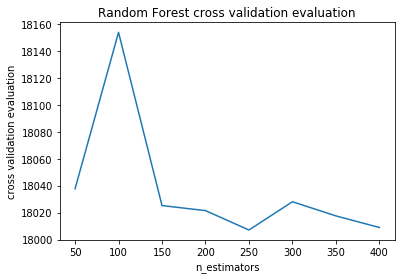

In [34]:
# visualize results
sns.lineplot(x=list(results.keys()), y=list(results.values()))
plt.title('Random Forest cross validation evaluation')
plt.xlabel('n_estimators')
plt.ylabel('cross validation evaluation')

In this exercise, you have explored one method for choosing appropriate parameters in a machine learning model.  

Learn more about [hyperparameter optimization](https://en.wikipedia.org/wiki/Hyperparameter_optimization), you're encouraged to start with **grid search**, which is a straightforward method for determining the best _combination_ of parameters for a machine learning model.  Thankfully, scikit-learn also contains a built-in function [`GridSearchCV()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) that can make your grid search code very efficient!